# High Level Machine Learning Classification Project Life Cycle


# 1.Domain Introduction

In [3]:
# We have the customer data for a telecom company which offers many services like 
# phone, internet, TV Streaming and Movie Streaming

In [2]:
# 2.Problem Statement
# "Find the Best model to predict behavior to retain customers. You can analyze all relevant customer data and
# develop focused customer retention programs."


# 3. Data Source
Available at : IBM watson analytics page (https://community.watsonanalytics.com/wpcontent/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?
cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_526400

# 4. Data Description
This data set provides info to help you predict behavior to retain customers. You can analyze all relevant
customer data and develop focused customer retention programs.
A telecommunications company is concerned about the number of customers leaving their landline business for
cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and
you have to find out who is leaving and why.
The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup,
device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless
billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


# 5. Identify the target variable
The Goal is to predict whether or not a particular customer is likely to retain services. This is represented by the
Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies
customer is retained by the company.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

# 7. Inspect the data

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [9]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
# 8. Data Manipulation
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
df[df['TotalCharges'].isna()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [12]:
len(df[df['TotalCharges'].isna()])

0

In [13]:
# Here we can see that Total Charges is an object variable. Let's Change it to float

In [14]:
# We need to convert the Total Charges from object type to Numeric
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [15]:
# every missing value record comes from customers who has not opted out
# ** Imputation **


In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [17]:
# ** Data formating **

In [18]:
# 9. Exploratory Data Analysis


In [19]:
df_categorical = df.select_dtypes(include=object)
column_categorical = df_categorical.columns

In [20]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [21]:
df_numerical = df.select_dtypes(include=np.float)
column_numerical = df_numerical.columns


In [22]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,29.85
5575-GNVDE,56.95,1889.50
3668-QPYBK,53.85,108.15
7795-CFOCW,42.30,1840.75
9237-HQITU,70.70,151.65


# Univariate Analysis

In [51]:
def display_plot(df, col_to_exclude, object_mode = True):
    n = 0
    this = []

    if object_mode:
            nrows = 4
            ncols = 4
            width = 20
            height = 20

    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10


    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)


            else:
                if (df[column].dtypes != 'O'):
                    this.append(column)


    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])
        
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None

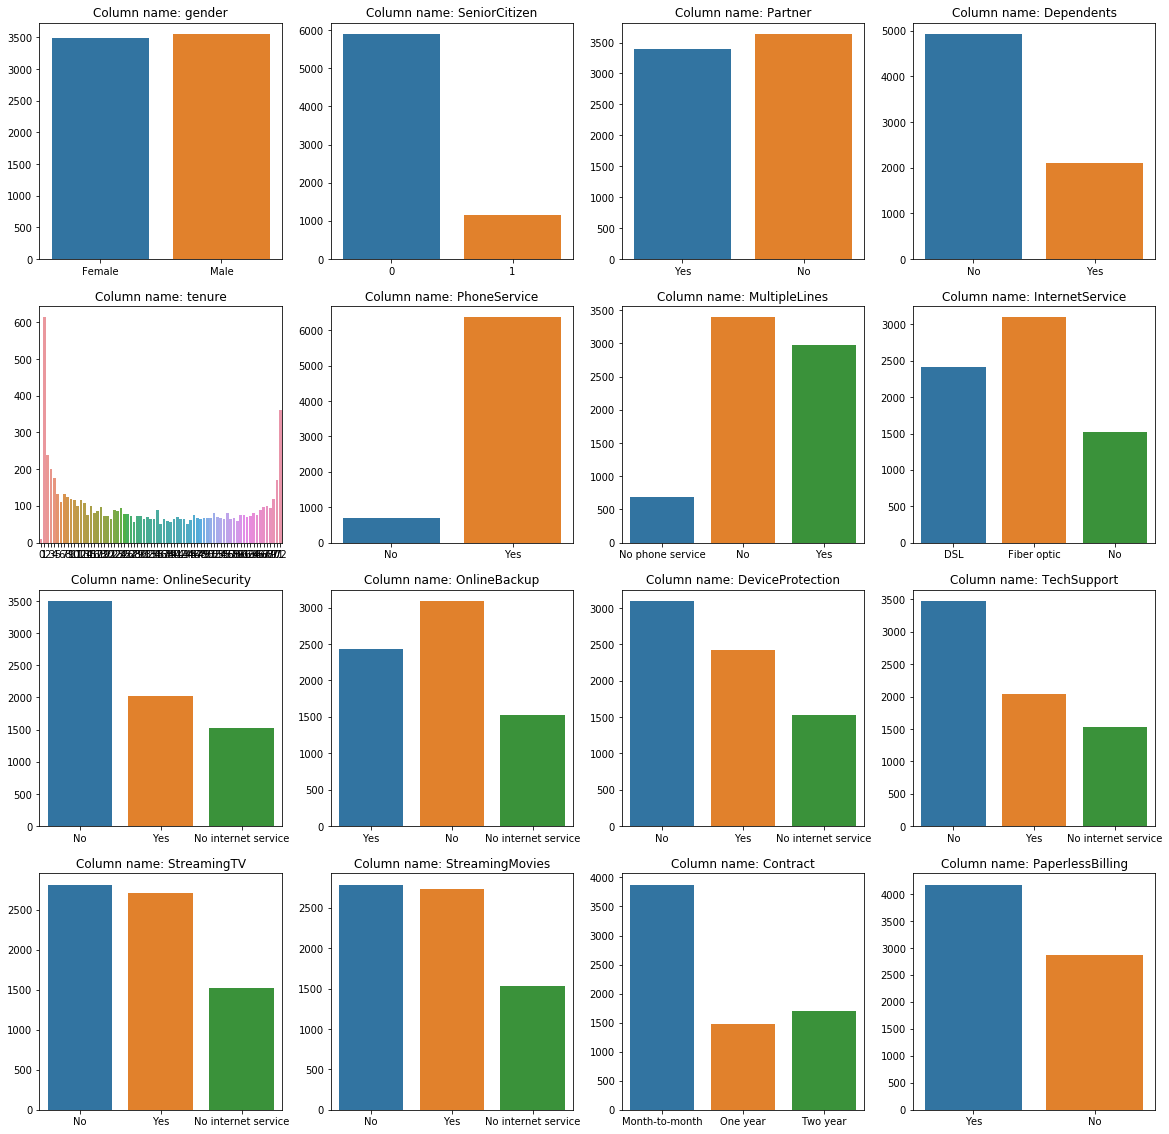

In [48]:
display_plot(df, 'customerid', object_mode = True)

IndexError: list index out of range

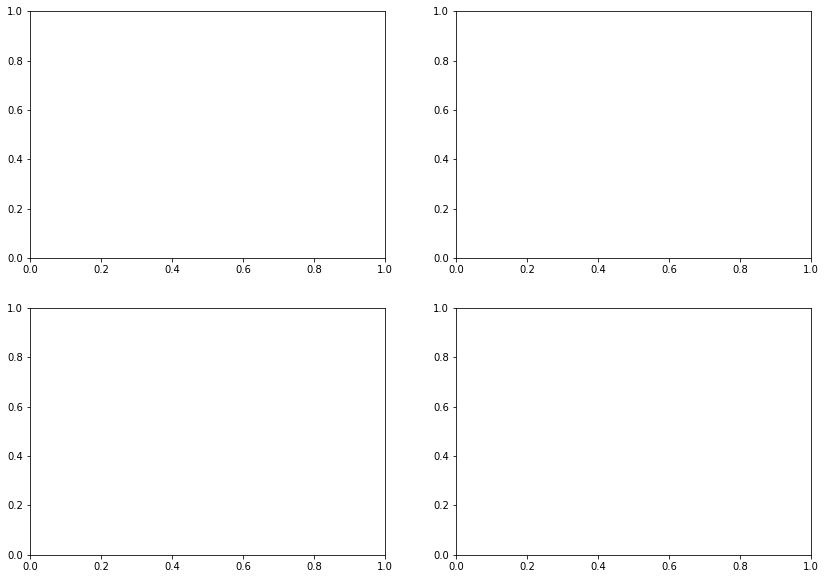

In [52]:
display_plot(df,'customerid', object_mode = False)

In [53]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


# 2. Internet Service (Primary) and other services, let's say streaming TV (secondary)
If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have
other services related to Internet (i.e. streaming TV, device protection).
But if the subscribers don't have the Internet services, this secondary service will not be available for
the subscribers.


In [54]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


With this conclusion, I opt to transform the feature value of No Phone / Internet service to be the same No
because it can be used another features (hence, phone service and internet service column) to explain.

In [71]:
df.describe(include=object)

AttributeError: 'NoneType' object has no attribute 'describe'

In [64]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.coloumns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)

    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'

return df

In [65]:
df = convert_no_service(df)
# Let's see the data after transformation.
display_plot(df, 'customerid', object_mode = True)

AttributeError: 'NoneType' object has no attribute 'coloumns'

In [58]:
# Now Let's Start Comparing.
# Gender Vs Churn
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100)) 

AttributeError: 'NoneType' object has no attribute 'gender'

In [60]:
# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100))
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))

AttributeError: 'NoneType' object has no attribute 'Contract'

In [ ]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)**100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((120/1869)*100))
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))